In [2]:
import numba
import sys
sys.path.insert(0, './python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math


In [19]:
%matplotlib inline

In [20]:
m = n = l = 4 # L of square grid

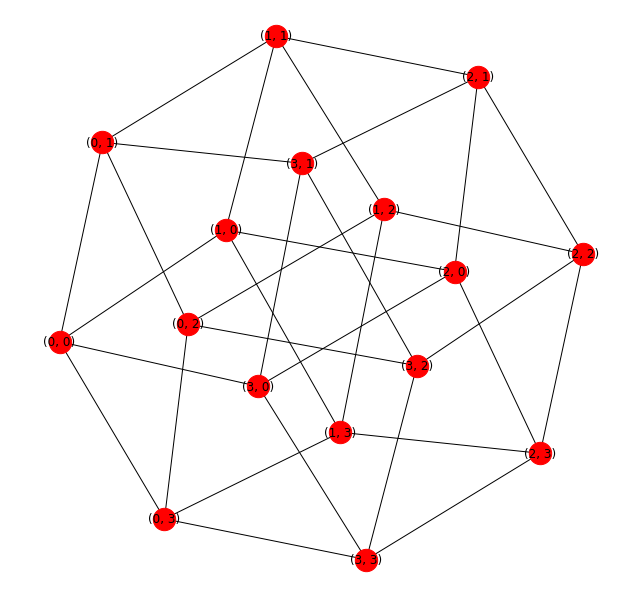

In [21]:
periodic = True
N, J_interaction = graph_gen.grid_2d_interaction(n,m, periodic=periodic)

In [25]:
h_start = 0
betas = np.arange(1e-4,3,0.3)

j = graph_gen.spin_glass()
J = graph_gen.set_J(J_interaction, j)

#J_rand = graph_gen.set_J(J_interaction_rand, j)

h = h_start
H = np.full((N,), h)

tree = model.model(N, H, J, J_interaction)

fe_ex = []
ener_ex = []
m_ex = []

for beta in betas:
    tree.exact(beta)
    fe_ex.append(tree.free_energy)
    ener_ex.append(tree.E_mean)
    m_ex.append(tree.M_mean)


Enumerating...
65000 / 65536(99.18%), E = -0.603, Z = 6.5e+04, F = -1.11e+05
Energy: -3e-05 
M: 2.03e-20 
S: 0.693
Free_energy: -6931.472 (-6931.472)
Enumerating...
65000 / 65536(99.18%), E = -0.603, Z = 8.01e+04, F = -37.6
Energy: -0.0883 
M: -1.28e-17 
S: 0.68
Free_energy: -2.354 (-2.354)
Enumerating...
65000 / 65536(99.18%), E = -0.603, Z = 1.48e+05, F = -19.8
Energy: -0.167 
M: -1.13e-17 
S: 0.645
Free_energy: -1.242 (-1.242)
Enumerating...
65000 / 65536(99.18%), E = -0.603, Z = 3.85e+05, F = -14.3
Energy: -0.231 
M: 6.25e-18 
S: 0.597
Free_energy: -0.895 (-0.895)
Enumerating...
65000 / 65536(99.18%), E = -0.603, Z = 1.32e+06, F = -11.7
Energy: -0.282 
M: -5.08e-18 
S: 0.544
Free_energy: -0.735 (-0.735)
Enumerating...
65000 / 65536(99.18%), E = -0.603, Z = 5.68e+06, F = -10.4
Energy: -0.322 
M: -9.92e-19 
S: 0.49
Free_energy: -0.649 (-0.649)
Enumerating...
65000 / 65536(99.18%), E = -0.603, Z = 2.9e+07, F = -9.55
Energy: -0.355 
M: 1.67e-17 
S: 0.436
Free_energy: -0.597 (-0.597)
En

In [26]:
import bp_nn
import imp
imp.reload(bp_nn)


fe_nn = []
ener_nn = []
m_nn = []
net = bp_nn.bp_nn(N, tree, True)
for beta in betas:
    
    net.train(beta = beta, max_step=1000,
              lr=0.005,
             std_fe_limit=0.001)
    net.compute_stat(beta, batch_size = 100000)
    fe_nn.append(net.F_mean)
    ener_nn.append(net.E_mean)
    m_nn.append(net.M_mean)



 0.00 592 fe: -6931.472 +- 0.001 M: -0.013
 0.30 1000 fe: -2.354 +- 0.010 M: 0.0025
 0.60 1000 fe: -1.240 +- 0.018 M: -0.00412
 0.90 1000 fe: -0.891 +- 0.022 M: -0.014
 1.20 1000 fe: -0.730 +- 0.025 M: -0.00075
 1.50 1000 fe: -0.641 +- 0.025 M: 0.00888
 1.80 1000 fe: -0.588 +- 0.022 M: 0.0158
 2.10 1000 fe: -0.556 +- 0.020 M: 0.00812
 2.40 1000 fe: -0.534 +- 0.015 M: 0.00963
 2.70 1000 fe: -0.520 +- 0.009 M: -0.0191
free_energy: -0.521,  std_fe: 0.010, mag_mean: 0.002, entropy: 0.255 energy: -0.426

In [27]:
import bp_solver

imp.reload(bp_solver)

fe_bp = []
ener_bp = []
m_bp = []
BP_tree = bp_solver.BP_solver(tree) 

for beta in betas:
    
    BP_tree.converge(beta, error = 1e-20)
    fe_bp.append(BP_tree.F)
    ener_bp.append(BP_tree.E_mean)
    m_bp.append(BP_tree.M_mean)


 iter:5,  err: 0.000 free_energy -6931.47
 bp 
 fe: -6931.472, ener: -0.000, M: 0.000
 iter:1,  err: 0.000 free_energy -2.35
 bp 
 fe: -2.354, ener: -0.089, M: 0.000
 iter:1,  err: 0.000 free_energy -1.24
 bp 
 fe: -1.243, ener: -0.171, M: 0.000
 iter:1,  err: 0.000 free_energy -0.90
 bp 
 fe: -0.898, ener: -0.242, M: 0.000
 iter:1,  err: 0.000 free_energy -0.74
 bp 
 fe: -0.741, ener: -0.301, M: 0.000
 iter:1,  err: 0.000 free_energy -0.66
 bp 
 fe: -0.658, ener: -0.348, M: 0.000
 iter:1,  err: 0.000 free_energy -0.61
 bp 
 fe: -0.610, ener: -0.385, M: 0.000
 iter:1,  err: 0.000 free_energy -0.58
 bp 
 fe: -0.580, ener: -0.415, M: 0.000
 iter:1,  err: 0.000 free_energy -0.56
 bp 
 fe: -0.561, ener: -0.438, M: 0.000
 iter:1,  err: 0.000 free_energy -0.55
 bp 
 fe: -0.548, ener: -0.457, M: 0.000


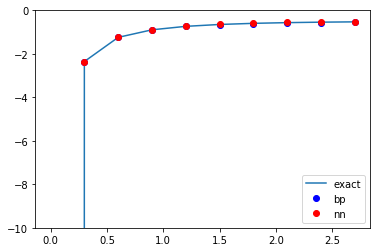

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
x = betas
plt.plot(x, fe_ex, label = "exact")
plt.plot(x,fe_bp, "bo", label="bp")
plt.plot(x,fe_nn, "ro", label="nn")
plt.legend()
plt.ylim(-10,0)
plt.show()

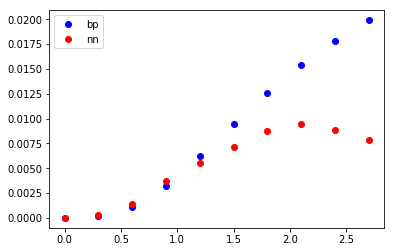

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
x = betas
fe_ex = np.array(fe_ex)
fe_bp = np.array(fe_bp)
fe_nn = np.array(fe_nn)

plt.plot(x, abs(fe_bp - fe_ex), "bo", label="bp")
plt.plot(x, abs(fe_nn - fe_ex), "ro", label="nn")
plt.legend()
plt.show()

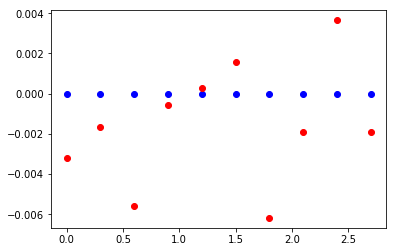

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
x = betas
m_ex = np.array(m_ex)
m_bp = np.array(m_bp)
m_nn = np.array(m_nn)

plt.plot(x, m_bp - m_ex, "bo", label="bp")
plt.plot(x, m_nn - m_ex, "ro", label="nn")
plt.legend
plt.show()

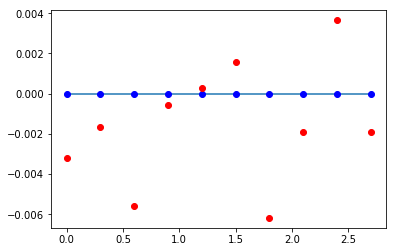

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
x = betas
plt.plot(x, m_ex, label = "exact")
plt.plot(x,m_bp, "bo", label="bp")
plt.plot(x,m_nn, "ro", label="nn")
plt.legend
plt.show()